# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Importing the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import requests
import tweepy
import json
import time
import os

In [2]:
# Importing the twitter-archive_enhanced.csv
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Create the Request
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

200 means that it was successful

In [4]:
# Access the Content and Write to a File
with open(os.path.join('./', url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)


In [5]:
# create the dataframe

predictions = pd.read_csv('image-predictions.tsv', sep='\t')

# check if it loaded correctly
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [68]:
# Fill in consumer keys & tokens & authorize access to Tweepy API
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [69]:
#create a list of the tweet IDs
tweet_ids = archive.tweet_id.values
len(tweet_ids)

2356

In [76]:
from timeit import default_timer as timer

#create loop to get data for the list of IDs available & unavailable
count = 0

# tweets unavailable
unavailable = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            unavailable[tweet_id] = e
            pass


end = timer()
print(end - start)
print(unavailable)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Had issues trying to access the data - developer account was created and successful and correct keys & tokens were used. A community leader on slack attempted to help me (tried below code) but still unsuccessful.

In [71]:
tweets = []
ids_with_no_tweet = []

for each in archive['tweet_id']:
    try:
        tweets.append(api.get_status(each))
    except:
        ids_with_no_tweet.append(each)

print("There are {} tweets available and {} tweet ids were not accessible".format(len(tweets), len(ids_with_no_tweet)))

There are 0 tweets available and 2356 tweet ids were not accessible


Decided to rather read the file provided to us in the resources.

In [6]:
# importing the tweet-jason.txt file 
tweet_status = pd.read_json('tweet-json.txt', lines = True,encoding='utf-8')

In [7]:
#check to see if the import was sucessful
tweet_status.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [8]:
# understand what comes with the API data
tweet_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [9]:
# dropping the unnessecary columns and keeping the ID, favourite count & retweet count
tweet_stats = tweet_status.filter(['id', 'favorite_count', 'retweet_count'], axis = 1)


In [10]:
#checking if it is correct
tweet_stats.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [77]:
with open('twitter-api.rtf', 'r') as file:
    text = file.read()
print(text)

{\rtf1\ansi\ansicpg1252\cocoartf1561\cocoasubrtf600
{\fonttbl\f0\fmodern\fcharset0 Courier;}
{\colortbl;\red255\green255\blue255;\red0\green0\blue0;}
{\*\expandedcolortbl;;\cssrgb\c0\c0\c0;}
\margl1440\margr1440\vieww37900\viewh20680\viewkind0
\deftab720
\pard\pardeftab720\sl280\partightenfactor0

\f0\fs24 \cf2 \expnd0\expndtw0\kerning0
\outl0\strokewidth0 \strokec2 import tweepy\
from tweepy import OAuthHandler\
import json\
from timeit import default_timer as timer\
\
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\
# These are hidden to comply with Twitter's API terms and conditions\
consumer_key = 'HIDDEN'\
consumer_secret = 'HIDDEN'\
access_token = 'HIDDEN'\
access_secret = 'HIDDEN'\
\
auth = OAuthHandler(consumer_key, consumer_secret)\
auth.set_access_token(access_token, access_secret)\
\
api = tweepy.API(auth, wait_on_rate_limit=True)\
\
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\
# df_1 is a DataFrame with the twitter_archive_enhan

In [ ]:
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

#create a list of the tweet IDs
tweet_ids = archive.tweet_id.values
len(tweet_ids)

from timeit import default_timer as timer

#create loop to get data for the list of IDs available & unavailable
count = 0

# tweets unavailable
unavailable = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            unavailable[tweet_id] = e
            pass


end = timer()
print(end - start)
print(unavailable)


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [11]:
# Assessing the archive dataframe visually to see if there are any issues
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


1) Remove retweets - need original tweets

2) Remove replies - need original tweets

3) Doggo, floofer, puuper & puppo should all be one column

4) Name column - some names seem to not be names, such as "a", "such"

In [12]:
#Assess programmatticaly 
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

!) tweet_id should be a string not an integar

2) timestamp should be a date datatyoe, not an object

In [13]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


1) rating_denominator should not be more than 10

In [14]:
#checking to see if there are duplicated rows
archive.duplicated().sum()

0

No duplicated rows

In [15]:
# Assessing the doggo, floofer, pupper & puppo columns to see if there is any other unexpected values
archive["doggo"].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [16]:
archive["floofer"].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
archive["pupper"].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
archive["puppo"].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

Can only see doggo, floofer, pupper, puppo & none. Do not need to clean up values other than combine columns together to create one categorical column

In [19]:
# Seeing what other names are coming and need to be changed to None in the name column
archive["name"].value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Lola         10
Tucker       10
Penny        10
Bo            9
Winston       9
Sadie         8
the           8
Buddy         7
an            7
Toby          7
Daisy         7
Bailey        7
Milo          6
Dave          6
Jack          6
Rusty         6
Bella         6
Leo           6
Stanley       6
Oscar         6
Koda          6
Scout         6
Jax           6
Phil          5
           ... 
Rorie         1
Leonidas      1
Bayley        1
Vixen         1
Bronte        1
Rufio         1
Skittle       1
Jaspers       1
Cecil         1
Dale          1
Clyde         1
Anna          1
Billl         1
Cedrick       1
Pinot         1
Bradlay       1
Ricky         1
Meera         1
Edmund        1
Kaiya         1
Heinrich      1
Lorelei       1
Furzey        1
Sully         1
Dudley        1
Bobb          1
Rover         1
Lillie        1
Tommy         1
Brandi        1
Name: name, Length: 957,

Entries with names such as "a", "an", "my", "the" and "such" need to be changed to None

In [20]:
# Assessing the predictions dataframe
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


We do not need to keep non-dogs in the dataset. Also the predictions seem to differ, only need to keep the correct (true) predictions.

In [21]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


tweet_id should be a string & not an integar

In [22]:
# Assessing to see if there are duplicates in the dataset
predictions.duplicated().value_counts()

False    2075
dtype: int64

There are no duplicates in the dataset

In [23]:
#checking out the statitistics of the predictions dataframe
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


All seems good and not out of place

In [24]:
# Assessing the tweet_stats dataframe
tweet_stats

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


All looks good from a visual look

In [25]:
# Checking the datatyoes and null-values
tweet_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


id should be a string and it name changed to tweet_id

In [26]:
#Assess if there are anything out of the ordinary in the dataframe
tweet_stats.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


All looks good in the predictions dataframe

### Quality issues
1. Archive dataframe - tweet_id needs to be a string data type. Timestamp needs to change to date data type.

2/3. Archive dataframe - (2) remove retweets & (3) replies. Drop the fields that relate to reply & retweet data

4. Archive dataframe - remove denominators that are not 10


5. Archive dataframe - name column - make names starting with "a" or "an", "the" and "my" which should rather be "None"


6. Predictions dataframe - remove none dogs from the dataframe (column - p1_dog, p2_dog or p3_dog). Combine into one column called "breed" and with its associated confidence


7. Tweet_stats dataframe - convert ID to string data type & rename to tweet_ID


8. Predictions dataframe - change tweet_id to string data_type


### Tidiness issues
1. Archive dataframe - doggo, floofer, pupper & puppo should be in one column & categorical

2. Append the tweet_status dataframe to the archive dataframe

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [27]:
# Make copies of original pieces of data
archive_clean = archive.copy()
predictions_clean = predictions.copy()
tweet_stats_clean = tweet_stats.copy()

# Quality Issues
### Issue #1:

#### Define: 
Archive dataframe - tweet_id needs to be a string data type. Timestamp needs to change to date data type.

#### Code

In [48]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [28]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)


archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])


#### Test

In [29]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### Issue 2 & 3:

#### Define
Archive dataframe - (2) remove retweets & (3) replies. Drop the fields that relate to reply & retweet data

#### Code

In [30]:
# Dropping the unnecessary rows
archive_clean = archive_clean[archive_clean['in_reply_to_status_id'].isnull()]
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]
# Dropping the unnecessary columns
archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace = True)

In [31]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


#### Test

In [32]:
archive_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Issue 4
### Define
Archive dataframe - all denominators need to be 10 - change denominators that are not 10 to 10

### Code

In [33]:
archive_clean.loc[:, 'rating_denominator'] = 10

### Test

In [34]:
archive_clean['rating_denominator'].value_counts()

10    2097
Name: rating_denominator, dtype: int64

In [35]:
archive_clean['rating_numerator'].value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

## Issue 5
### Define
Archive dataframe - name column - make names starting with "a" or "an", "the" and "my" which should rather be "None"

### Code

In [42]:
archive_clean.name = archive_clean.name.replace('a', 'None')
archive_clean.name = archive_clean.name.replace('an', 'None')
archive_clean.name = archive_clean.name.replace('my', 'None')
archive_clean.name = archive_clean.name.replace('the', 'None')
archive_clean.name = archive_clean.name.replace('such', 'None')

### Test

In [43]:
archive_clean.name.value_counts()

None          674
Charlie        11
Lucy           11
Cooper         10
Oliver         10
Tucker          9
Penny           9
Sadie           8
Lola            8
Winston         8
Toby            7
Daisy           7
Bella           6
Bo              6
Koda            6
Stanley         6
Bailey          6
Oscar           6
Jax             6
Rusty           5
Buddy           5
Scout           5
Louis           5
Leo             5
Dave            5
Bentley         5
Milo            5
Chester         5
Gary            4
Jerry           4
             ... 
Sailer          1
Hero            1
Comet           1
Eazy            1
Erik            1
Kobe            1
Sailor          1
Jim             1
Kayla           1
Wiggles         1
officially      1
Hurley          1
Oreo            1
Jessifer        1
Birf            1
Shelby          1
Akumi           1
Mutt            1
Pancake         1
Randall         1
Harvey          1
Jebberson       1
Mark            1
Paull           1
Blanket   

## Issue 6
### Define
Predictions dataframe - remove none dogs from the dataframe (column - p1_dog, p2_dog or p3_dog). Combine into one column called "breed" and with its associated confidence

### Code & Test

In [44]:
# list of breeds
breed = []
# list of confidence of the prediction
confidence = []

# function to choose the breed which is true 
def choose_breed(df):
    if df['p1_dog'] == True:
        breed.append(df['p1'])
        confidence.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        breed.append(df['p2'])
        confidence.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        breed.append(df['p3'])
        confidence.append(df['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
# function call        
predictions_clean.apply(choose_breed, axis=1)
# add the two columns
predictions_clean['breed'] = breed
predictions_clean['confidence'] = confidence
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [45]:
# drop unnecessary columns

predictions_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf','p2_dog',
                  'p3', 'p3_conf', 'p3_dog'], axis=1, inplace= True)

predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
breed         2075 non-null object
confidence    2075 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 64.9+ KB


## Issue 7 
### Define
Tweet_stats dataframe - convert ID to string data type & rename to tweet_ID

### Code

In [46]:
tweet_stats_clean['id'] = tweet_stats_clean['id'].astype(str)

In [47]:
tweet_stats_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

### Test

In [48]:
tweet_stats_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


## Issue 8
### Define
Predictions dataframe - change tweet_id to string data_type

### Code

In [49]:
predictions_clean['tweet_id'] = predictions_clean['tweet_id'].astype(str)

### Test

In [50]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id      2075 non-null object
jpg_url       2075 non-null object
breed         2075 non-null object
confidence    2075 non-null float64
dtypes: float64(1), object(3)
memory usage: 64.9+ KB


# Tidiness
## Issue 9

### Define
Archive dataframe - doggo, floofer, pupper & puppo should be in one column & categorical


### Code

In [51]:
# replace 'None' with ''

archive_clean.doggo.replace('None', '', inplace = True)
archive_clean.floofer.replace('None', '', inplace = True)
archive_clean.pupper.replace('None', '', inplace = True)
archive_clean.puppo.replace('None', '', inplace = True)

#create a new column 

archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

archive_clean.dog_stage.value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [52]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dog_stage             2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 229.4+ KB


In [53]:
archive_clean.loc[archive_clean.dog_stage=='doggopupper','dog_stage']='Doggo, Pupper'
archive_clean.loc[archive_clean.dog_stage=='doggofloofer','dog_stage']='Doggo, Floofer'
archive_clean.loc[archive_clean.dog_stage=='doggopuppo','dog_stage']='Doggo, Puppo'

In [54]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dog_stage             2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 229.4+ KB


In [55]:
#replace blank cells with unknown
archive_clean.dog_stage.replace('','Unknown', inplace=True)
#replace nan with Unknown
archive_clean.dog_stage.value_counts()

# drop the unnecessary columns
archive_clean.drop(['doggo','pupper','floofer','puppo'], axis=1,inplace=True)
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.8+ KB


## Issue 10

### Define
create column with rating in archive daraframe using the rating_numerator & rating_denominator

### Code

In [56]:
# Create new column rating=rating_numerator/rating_denominator.
archive_clean['ratings'] = archive_clean.rating_numerator / archive_clean.rating_denominator

### Test

In [58]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null object
ratings               2097 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 180.2+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
twitter_archive_master = pd.merge(archive_clean, tweet_stats_clean, on='tweet_id', how='inner')

In [60]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null object
ratings               2097 non-null float64
favorite_count        2097 non-null int64
retweet_count         2097 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 213.0+ KB


In [61]:
twitter_archive_master = pd.merge(twitter_archive_master, predictions_clean, on='tweet_id', how='inner')
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 15 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null object
ratings               1971 non-null float64
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
breed                 1971 non-null object
confidence            1971 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(8)
memory usage: 246.4+ KB


In [62]:

twitter_archive_master.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,ratings,favorite_count,retweet_count,jpg_url,breed,confidence
97,869702957897576449,2017-05-30 23:51:58,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stanley. He likes road trips. Will shift ...,https://twitter.com/dog_rates/status/869702957...,13,10,Stanley,Unknown,1.3,29116,6728,https://pbs.twimg.com/media/DBHOOfOXoAABKlU.jpg,Pembroke,0.993449
1797,669037058363662336,2015-11-24 06:17:19,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Pancho and Peaches. Pancho is a C...,https://twitter.com/dog_rates/status/669037058...,10,10,None,Unknown,1.0,698,336,https://pbs.twimg.com/media/CUjlp51WcAA1vGA.jpg,Chihuahua,0.803528
871,725842289046749185,2016-04-29 00:21:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Colby. He's currently regretting all t...,https://twitter.com/dog_rates/status/725842289...,12,10,Colby,Unknown,1.2,7691,2970,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,toy_poodle,0.420463
141,857393404942143489,2017-04-27 00:38:11,"<a href=""http://twitter.com/download/iphone"" r...","Instead of the usual nightly dog rate, I'm sha...",https://www.gofundme.com/meeko-needs-heart-sur...,13,10,None,Unknown,1.3,6236,1785,https://pbs.twimg.com/media/C-YSwA_XgAEOr25.jpg,malamute,0.841597
252,831939777352105988,2017-02-15 18:54:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Emanuel. He's a h*ckin rare doggo. Dwe...,https://twitter.com/dog_rates/status/831939777...,12,10,Emanuel,doggo,1.2,26404,7031,https://pbs.twimg.com/media/C4uk0EWWQAAaZm1.jpg,Pomeranian,0.153862
1812,668902994700836864,2015-11-23 21:24:36,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lambeau. He's a Whistling Haiku from the ...,https://twitter.com/dog_rates/status/668902994...,11,10,Lambeau,Unknown,1.1,338,107,https://pbs.twimg.com/media/CUhruUgUAAAa8FQ.jpg,Brittany_spaniel,0.828425
1035,705066031337840642,2016-03-02 16:23:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Reese. He's a Chilean Sohcahtoa. Loves...,https://twitter.com/dog_rates/status/705066031...,12,10,Reese,Unknown,1.2,2378,683,https://pbs.twimg.com/media/CcjlzRkW0AMqmWg.jpg,Airedale,0.868658
328,819227688460238848,2017-01-11 17:01:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's wondering if you come here ...,https://twitter.com/dog_rates/status/819227688...,12,10,Finn,Unknown,1.2,25652,7733,https://pbs.twimg.com/media/C157Oq3WQAEOyHm.jpg,Border_terrier,0.482452
1031,705428427625635840,2016-03-03 16:23:38,"<a href=""http://twitter.com/download/iphone"" r...",This is Ambrose. He's an Alfalfa Ballyhoo. Dra...,https://twitter.com/dog_rates/status/705428427...,11,10,Ambrose,pupper,1.1,4188,1931,https://pbs.twimg.com/media/CcovaMUXIAApFDl.jpg,Chihuahua,0.774792
907,718454725339934721,2016-04-08 15:05:29,"<a href=""http://twitter.com/download/iphone"" r...",This pic is old but I hadn't seen it until tod...,https://twitter.com/dog_rates/status/718454725...,13,10,None,Unknown,1.3,5320,1685,https://pbs.twimg.com/media/Cfh2w6HWIAIIYAF.jpg,Unknown,0.000000


In [63]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index= False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [59]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,ratings,favorite_count,retweet_count,confidence
count,1971.000000,1971.0,1971.000000,1971.000000,1971.000000,1971.000000
mean,12.223237,10.0,1.222324,8949.106545,2784.449518,0.466219
std,41.634034,0.0,4.163403,12267.799790,4697.662893,0.339608
min,0.000000,10.0,0.000000,81.000000,16.000000,0.000000
25%,10.000000,10.0,1.000000,1997.000000,628.500000,0.140969
50%,11.000000,10.0,1.100000,4147.000000,1367.000000,0.461076
75%,12.000000,10.0,1.200000,11402.500000,3239.000000,0.777087
max,1776.000000,10.0,177.600000,132810.000000,79515.000000,0.999956


In [64]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 15 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null object
ratings               1971 non-null float64
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
breed                 1971 non-null object
confidence            1971 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(8)
memory usage: 246.4+ KB


In [65]:
twitter_archive_master.groupby('dog_stage')['ratings'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
"Doggo, Floofer",1.0,1.100000,NaN,1.1,1.100,1.1,1.1,1.1
"Doggo, Pupper",8.0,1.100000,0.256348,0.5,1.150,1.2,1.2,1.3
"Doggo, Puppo",1.0,1.300000,NaN,1.3,1.300,1.3,1.3,1.3
Unknown,1668.0,1.242746,4.524904,0.0,1.000,1.1,1.2,177.6
doggo,63.0,1.188889,0.147135,0.8,1.100,1.2,1.3,1.4
floofer,7.0,1.200000,0.115470,1.0,1.150,1.2,1.3,1.3
pupper,201.0,1.071642,0.208427,0.3,1.000,1.1,1.2,2.7
puppo,22.0,1.200000,0.130931,0.9,1.125,1.2,1.3,1.4


In [66]:
twitter_archive_master.groupby('dog_stage')['ratings'].mean()

dog_stage
Doggo, Floofer    1.100000
Doggo, Pupper     1.100000
Doggo, Puppo      1.300000
Unknown           1.242746
doggo             1.188889
floofer           1.200000
pupper            1.071642
puppo             1.200000
Name: ratings, dtype: float64

Text(0,0.5,'Mean')

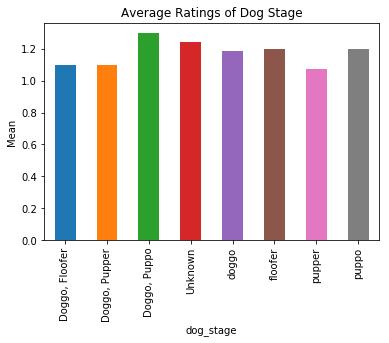

In [68]:
twitter_archive_master.groupby('dog_stage')['ratings'].mean().plot(kind = 'bar')
plt.title('Average Ratings of Dog Stage')
plt.xlabel('dog_stage')
plt.ylabel('Mean')

In [70]:
twitter_archive_master.groupby('dog_stage')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
"Doggo, Floofer",1.0,17169.000000,NaN,17169.0,17169.00,17169.0,17169.00,17169.0
"Doggo, Pupper",8.0,13219.875000,12872.606889,4849.0,8206.25,9346.5,10731.75,44619.0
"Doggo, Puppo",1.0,47844.000000,NaN,47844.0,47844.00,47844.0,47844.00,47844.0
Unknown,1668.0,8527.494604,11259.281660,81.0,1689.25,3927.5,11092.00,107956.0
doggo,63.0,19356.380952,22208.483825,2593.0,8268.00,12376.0,20502.50,131075.0
floofer,7.0,13206.000000,11258.315105,2262.0,5045.50,11302.0,17721.00,33345.0
pupper,201.0,7250.527363,10743.931650,693.0,2449.00,3275.0,7842.00,106827.0
puppo,22.0,21582.090909,28034.339585,3277.0,7043.50,13387.5,19691.25,132810.0


Text(0,0.5,'Mean')

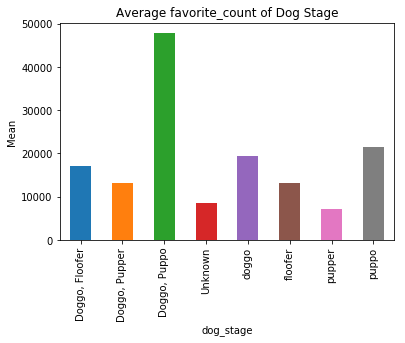

In [71]:
twitter_archive_master.groupby('dog_stage')['favorite_count'].mean().plot(kind = 'bar')
plt.title('Average favorite_count of Dog Stage')
plt.xlabel('dog_stage')
plt.ylabel('Mean')

In [72]:
twitter_archive_master.groupby('dog_stage')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
"Doggo, Floofer",1.0,3433.000000,NaN,3433.0,3433.00,3433.0,3433.00,3433.0
"Doggo, Pupper",8.0,4397.250000,5383.455840,1265.0,2365.00,2543.0,3193.00,17621.0
"Doggo, Puppo",1.0,19196.000000,NaN,19196.0,19196.00,19196.0,19196.00,19196.0
Unknown,1668.0,2593.125300,3954.863172,16.0,587.25,1315.5,3117.75,56625.0
doggo,63.0,7125.698413,12868.874516,725.0,2025.50,3327.0,5422.00,79515.0
floofer,7.0,4968.714286,6163.579715,496.0,1825.00,3265.0,4436.50,18497.0
pupper,201.0,2382.502488,3584.033641,103.0,695.00,1219.0,2475.00,32883.0
puppo,22.0,6473.954545,10301.927187,716.0,1712.50,3130.0,6284.25,48265.0


Text(0,0.5,'Mean')

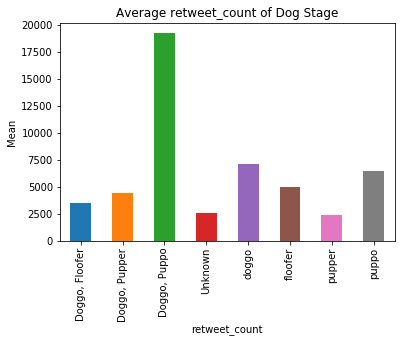

In [73]:
twitter_archive_master.groupby('dog_stage')['retweet_count'].mean().plot(kind = 'bar')
plt.title('Average retweet_count of Dog Stage')
plt.xlabel('retweet_count')
plt.ylabel('Mean')

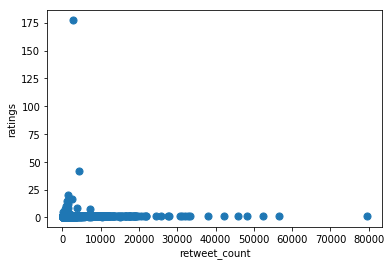

In [77]:
twitter_archive_master.plot.scatter(x = 'retweet_count', y = 'ratings', s = 50)

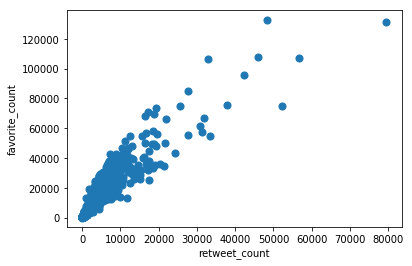

In [79]:
twitter_archive_master.plot.scatter(x = 'retweet_count', y = 'favorite_count', s = 50)

In [78]:
twitter_archive_master.nlargest(n=10, columns=['retweet_count'])

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,ratings,favorite_count,retweet_count,jpg_url,breed,confidence
769,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,1.3,131075,79515,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333
397,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,Unknown,1.3,107015,56625,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.505370
804,739238157791694849,2016-06-04 23:31:25,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,1.3,75163,52360,https://pbs.twimg.com/ext_tw_video_thumb/73923...,Eskimo_dog,0.503372
306,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,1.3,132810,48265,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015
58,879415818425184262,2017-06-26 19:07:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,Unknown,1.3,107956,45849,https://pbs.twimg.com/ext_tw_video_thumb/87941...,English_springer,0.383404
330,819004803107983360,2017-01-11 02:15:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,1.4,95450,42228,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,standard_poodle,0.351308
399,806629075125202948,2016-12-07 22:38:52,"<a href=""http://twitter.com/download/iphone"" r...","""Good afternoon class today we're going to lea...",https://twitter.com/dog_rates/status/806629075...,13,10,None,Unknown,1.3,75639,37911,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,cocker_spaniel,0.046403
633,761672994376806400,2016-08-05 21:19:27,"<a href=""http://twitter.com/download/iphone"" r...",Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,https://twitter.com/dog_rates/status/761672994...,10,10,None,Unknown,1.0,55016,33421,https://pbs.twimg.com/ext_tw_video_thumb/76167...,Unknown,0.000000
108,866450705531457537,2017-05-22 00:28:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,pupper,1.3,106827,32883,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,French_bulldog,0.905334
1467,676219687039057920,2015-12-14 01:58:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Kenneth. He's stuck in a bubble. 10/10...,https://twitter.com/dog_rates/status/676219687...,10,10,Kenneth,Unknown,1.0,67100,31989,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,whippet,0.000132


In [83]:
twitter_archive_master.groupby('breed')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
Afghan_hound,3.0,5976.000000,4452.291208,1893.0,3602.50,5312.0,8017.50,10723.0
Airedale,12.0,1393.750000,1308.044906,83.0,764.75,991.0,1447.00,4800.0
American_Staffordshire_terrier,16.0,2310.812500,1619.751101,231.0,1140.75,2071.5,3567.25,6005.0
Appenzeller,2.0,1458.000000,989.949494,758.0,1108.00,1458.0,1808.00,2158.0
Australian_terrier,2.0,3078.500000,3363.706958,700.0,1889.25,3078.5,4267.75,5457.0
Bedlington_terrier,6.0,7510.166667,11497.399435,1263.0,1658.50,2999.0,5134.50,30742.0
Bernese_mountain_dog,11.0,1616.545455,1266.919126,60.0,841.00,1522.0,1885.00,4903.0
Blenheim_spaniel,10.0,2583.300000,3211.962226,118.0,310.25,1003.5,4021.00,8987.0
Border_collie,12.0,2207.750000,2457.149721,137.0,662.00,1250.0,2535.75,7788.0


In [85]:
twitter_archive_master.groupby('retweet_count').rank(method='average', ascending=False)

TypeError: 'NoneType' object is not callable

### Insights:
1.

2.

3.

### Visualization